# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# H_0 = The response rate of the new email template will be = 5% (Same effectiveness as the current template)

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [2]:
# H_1 = The response rate of the new email template will be != 5% (More or less effective than the current template)

In [3]:
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
%matplotlib inline
sns.set_style('whitegrid')

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [4]:
power_analysis = TTestIndPower()

In [5]:
# Obtain the required sample size for Power = 0.8, alpha = 0.05, and response rate = 0.1
alpha = 0.05
power = 0.8
e_size = 0.01 / 0.0475 # This must be Cohen's d normailized effect size, NOT just mean difference

sample_size = math.ceil(power_analysis.solve_power(effect_size=e_size, alpha=alpha, power=power, alternative='larger'))
print(f'The sample size must be {sample_size}')

The sample size must be 280


## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

C:\Users\dougl\Anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


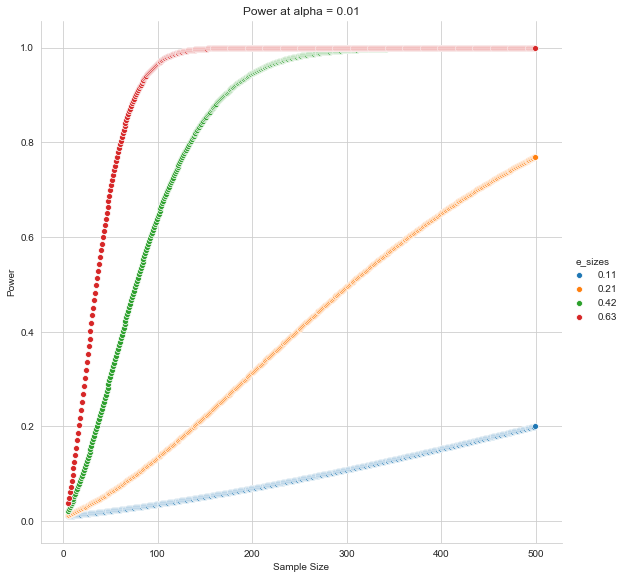

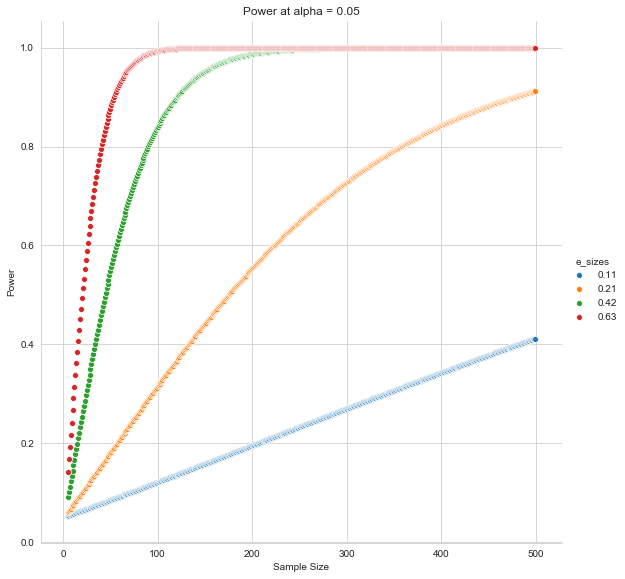

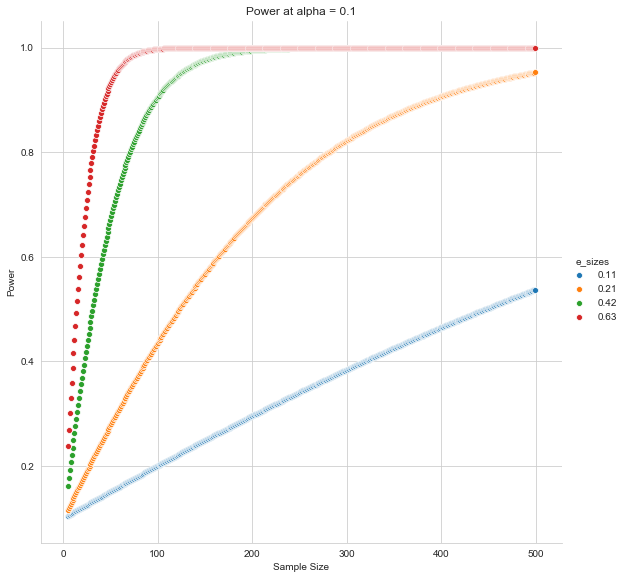

In [6]:
#Your code; plot power curves for the various alpha and effect size combinations
test_rdiffs = [.005, .01, .02, .03]
test_esizes = [round(0.005/0.0475, 2), round(0.01/0.0475, 2), round(0.02/0.0475, 2), round(0.03/0.0475, 2)]
test_alphas = [.01, .05, .1]
test_ssizes = range(5, 500)

for a in test_alphas:
    powers = []
    samp_sizes=[]
    e_sizes=[]
    for e in test_esizes:
        for s in test_ssizes:
            powers.append(power_analysis.solve_power(effect_size=e, alpha=a, nobs1=s, alternative='two-sided'))
            samp_sizes.append(s)
            e_sizes.append(e)
            df = pd.DataFrame([])
            df['powers'] = powers
            df['samp_sizes'] = samp_sizes
            df['e_sizes'] = e_sizes
    sns.pairplot(data=df, hue='e_sizes', x_vars=['samp_sizes'], y_vars=['powers'], kind='scatter', size=8)
    plt.title(f'Power at alpha = {a}')
    plt.ylabel('Power')
    plt.xlabel('Sample Size')
    plt.show();

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

#### If we assume a 1%  effect size (.01 response rate difference, or 1% difference between means), we can achieve good statistical power (0.8) at alpha = 0.05 with a sample size of about 350. This means that we would have to send our new template to 350 customers to determine how the new template is performing relative to the old one.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.